<a href="https://colab.research.google.com/github/Carol-Coutinho/OU3/blob/main/AVS02_OU3_Caroline_Coutinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AVS_02_OU3

Caroline Coutinho

##Parte 1: 

Flash Isotérmico Binário por Rachford-Rice.

Mistura escolhida: Tolueno e Benzeno.

Primeiro vamos preparar o Kernel:

In [ ]:
# Preparando kernel
import pandas as pd
#import pickle
!pip3 install pickle5
import pickle5 as pickl
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 132 kB 6.5 MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219301 sha256=df7f369ca3bb6458d4be5ce68f002a55bc508156f743527dbd4f0e31cc48a27f
  Stored in directory: /root/.cache/pip/wheels/7e/6a/00/67136a90d6aca437d806d1d3cedf98106e840c97a3e5188198
Successfully built pickle5


In [ ]:
# Para ler/carregar
with open('/content/databank_properties.pickle', 'rb') as handle:
    dados, all_units = pickl.load(handle)

FileNotFoundError: ignored

In [ ]:
# Carregamento das funções úteis
from OU3_funcoes_uteis_v01 import *

In [ ]:
OU3_funcoes_uteis_v01.py

Analisando o banco de dados e buscando os componentes necessários: Tolueno e Benzeno.


In [ ]:
dados.shape


(468, 31)

In [ ]:
dados.columns

Index(['num', 'name', 'molar_mass', 'fusion_point', 'boiling_point',
       'critical_temp', 'critical_pressure', 'critical_volume', 'zc',
       'acentric_factor', 'liq_density', 'temp_ref_liq_density',
       'dipole_moment', 'cp_a', 'cp_b', 'cp_c', 'cp_d', 'visc_b', 'visc_c',
       'delta_h0f_gas', 'delta_g0f_gas', 'pvap_a', 'pvap_b', 'pvap_c',
       'temp_max_pvap', 'temp_min_pvap', 'pvap_h_a', 'pvap_h_b', 'pvap_h_c',
       'pvap_h_d', 'delta_h_vap_bp'],
      dtype='object')

In [ ]:
# Buscando o primeiro componente:
filtro1 = dados.name.str.contains('BENZENE')
dados[filtro1]


,num,name,molar_mass,fusion_point,boiling_point,critical_temp,critical_pressure,critical_volume,zc,acentric_factor,liq_density,temp_ref_liq_density,dipole_moment,cp_a,cp_b,cp_c,cp_d,visc_b,visc_c,delta_h0f_gas,delta_g0f_gas,pvap_a,pvap_b,pvap_c,temp_max_pvap,temp_min_pvap,pvap_h_a,pvap_h_b,pvap_h_c,pvap_h_d,delta_h_vap_bp
14,383,"1,2,3-TRIMETHYLBENZENE",120.195,247.7,449.2,664.5,34.1,430.0,0.270,0.390,0.894,293.0,0.6,-1.658000,0.151300,-0.000079,1.579000e-08,NaN,NaN,-2.29,29.77,16.2121,3670.22,-66.07,479.00,329.0,NaN,NaN,NaN,NaN,9570.0
16,384,"1,2,4-TRIMETHYLBENZENE",120.195,227.0,442.5,649.1,31.9,430.0,0.258,0.390,0.880,289.0,0.3,-1.115000,0.149000,-0.000078,1.523000e-08,872.74,297.75,-3.33,27.95,16.2190,3622.58,-64.59,471.00,324.0,56.241,-7256.56,-5.459,7.270,9380.0
24,385,"1,3,5-TRIMETHYLBENZENE",120.195,228.4,437.9,637.3,30.9,433.0,0.260,0.398,0.865,293.0,0.1,-4.679000,0.160600,-0.000088,1.839000e-08,437.52,268.27,3.84,28.19,16.2893,3614.19,-63.57,466.00,321.0,58.041,-7326.78,-5.706,7.220,9330.0
28,407,"1,4-DIETHYLBENZENE",134.222,231.0,456.9,657.9,27.7,480.0,0.250,0.403,0.862,293.0,0.1,-8.937000,0.207100,-0.000133,3.370000e-08,NaN,NaN,-5.32,32.95,16.1140,3657.22,-71.18,487.00,335.0,NaN,NaN,NaN,NaN,9410.0
45,380,1-METHYL-2-ETHYLBENZENE,120.195,192.3,438.3,651.0,30.0,460.0,0.260,0.294,0.881,293.0,0.0,-3.928000,0.167100,-0.000098,2.228000e-08,NaN,NaN,0.29,31.33,16.1253,3535.33,-65.85,467.00,321.0,64.337,-7662.94,-6.617,7.180,9290.0
46,404,1-METHYL-2-ISOPROPYLBENZENE,134.222,NaN,451.5,670.0,28.6,NaN,NaN,0.277,0.876,293.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,15.9809,3564.52,-70.00,481.00,330.0,NaN,NaN,NaN,NaN,0.0
47,405,1-METHYL-2-ISOPROPYLBENZENE,134.222,NaN,448.3,666.0,29.0,NaN,NaN,0.279,0.861,293.0,0.0,-11.646000,0.216500,-0.000145,3.887000e-08,NaN,NaN,-7.00,0.00,15.9811,3543.79,-69.22,478.00,328.0,67.726,-8033.58,-7.076,8.390,9110.0
48,381,1-METHYL-3-ETHYLBENZENE,120.195,177.6,434.5,637.0,28.0,490.0,0.260,0.360,0.865,293.0,0.0,-6.926000,0.174200,-0.000104,2.388000e+00,8.00,0.00,0.00,-0.46,30.2200,16.15,3521.08,-64.64,463.0,318.000,65.67,-7678.110,-6.815,7.2
49,382,1-METHYL-4-ETHYLBENZENE,120.195,210.8,435.2,640.0,29.0,470.0,0.260,0.322,0.861,293.0,0.0,-6.523000,0.171400,-0.000101,2.279000e-08,463.17,266.08,-0.49,30.28,16.1135,3516.31,-64.23,463.00,318.0,61.404,-7422.59,-6.212,7.230,9180.0
50,406,1-METHYL-4-ISOPROPYLBENZENE,134.222,200.0,450.3,653.0,27.9,NaN,NaN,0.371,0.857,293.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,15.9424,3539.21,-70.10,480.00,329.0,63.225,-7800.97,-6.432,8.410,0.0


In [ ]:
# Buscando o segundo componente: 
filtro2 = dados.name.str.contains('TOLUENE')
dados[filtro2]

,num,name,molar_mass,fusion_point,boiling_point,critical_temp,critical_pressure,critical_volume,zc,acentric_factor,liq_density,temp_ref_liq_density,dipole_moment,cp_a,cp_b,cp_c,cp_d,visc_b,visc_c,delta_h0f_gas,delta_g0f_gas,pvap_a,pvap_b,pvap_c,temp_max_pvap,temp_min_pvap,pvap_h_a,pvap_h_b,pvap_h_c,pvap_h_d,delta_h_vap_bp
440,286,TOLUENE,92.141,178.0,383.8,591.7,40.6,316.0,0.264,0.257,0.867,293.0,0.4,-5.817,0.1224,-0.000066,1.173000e-08,467.33,255.24,11.95,29.16,16.0137,3096.52,-53.67,410.0,280.0,56.785,-6283.5,-5.681,4.84,7930.0


Logo, pela pesquisa, sabemos que o número dos componentes desejados no banco de dados são 242 e 286.


In [ ]:
# O comprimento da lista será o número de componentes
lista_componentes = [ 242, 286]
nc = len(lista_componentes)
nc

2

In [ ]:
# Encontrando as temperaturas de ebulição dos dois componenetes: 
T_eb_comp = dados[dados['num'].isin(lista_componentes)]['boiling_point']
T_eb_comp = T_eb_comp.tolist()
T_eb_comp

[353.3, 383.8]

In [ ]:
# Calculo dos valores de K
# A prssão é de 760 mmHg e a temperatura escolhida foi entre os pontos de ebulição.
K_comp = f_K_Raoult_db(370.0, 760, lista_componentes, dados)[0]
K_comp

array([1.63010412, 0.66463997])

Obsrvamos que o benzeno é o componente mais volátil

In [ ]:
# Identificação do menos volátil - componente chave pesado
i_chk = np.argmin(K_comp)
i_chk

1

Como esperado o tolueno é o componente mais pesado.

In [ ]:
# Cálculo da volatilidade relativa - em ralção ao componente chave pesado - i_chk
alpha_comp = K_comp/K_comp[i_chk]
alpha_comp

array([2.45261222, 1.        ])

In [ ]:
# Definindo as condições de composição e pressão do flash

P_flash = 760 # mmHg
z = np.array([0.5, 0.5])
z

array([0.5, 0.5])

Para encontrarmos a temperatura de flash, iremos calcular o ponto de bolha e o ponto de orvalho, os quais irão definir a zona bifásica do equilíbrio líquido-vapor.

In [ ]:
f_calculo_PbPo_db('T', P_flash, z, lista_componentes, dados)

(365.2633698278335, 371.92390420927444, [353.3, 383.8])

In [ ]:
# Escolhendo a temperatura do flash entre as temperaturas de ponto de bolha e de vapor:
T_flash = 368.15 # K

Nesse momento iremos partir para a solução utilizando a função de Rachford-Rice.

A função é dada por: 

$$ \sum_{i=1}^{nc} \frac{z_i \cdot K_i}{1 + f_V \cdot (K_i - 1)} = 1 $$


In [ ]:
# Utilizando diretamente a função de solução do flash com a função de Rachford-Rice
f_sol_RR_flash_db(z, P_flash, T_flash, lista_componentes, dados)

{'K_comp': array([1.54838835, 0.62744758]),
 'alpha_comp': array([2.46775733, 1.        ]),
 'fv_flash': 0.43033037783267614,
 'x_eq': array([0.40453462, 0.59546538]),
 'y_eq': array([0.62637669, 0.37362331])}

In [ ]:
fv = f_sol_RR_flash_db(z, P_flash, T_flash, lista_componentes, dados)["fv_flash"]
fv

0.43033037783267614

In [ ]:
E = 50
V = E*fv
print(V)
L = E - V
print(L)

21.516518891633808
28.483481108366192


Resposta final encontrada na AVS_01:

$$V = 21.52$$
$$L = 28.48$$
$$x_B = 0.4045$$
$$x_T = 0.5955$$
$$y_B = 0.6264$$
$$y_T = 0.3736$$

Resposta final encontrada com a função de Rachford-Rice:

$$V = 21.52$$
$$L = 28.48$$
$$x_B = 0.4045$$
$$x_T = 0.5955$$
$$y_B = 0.6264$$
$$y_T = 0.3736$$



Observamos que as respostas são coerentes e que a função de Rachford-Rice está funcionando de maneira correta.

## Parte 2: 

Cálculo de flash para três componentes: Benzeno, Tolueno e Heptano.

Iremos utilizar a função de Rachford-Rice para calcular os dados de saída do Flash.

Como o Kernel já está preparado, iremos começar buscando os dados do novo componente: Heptano.

In [ ]:
# Buscando o componente:
filtro3 = dados.name.str.contains('HEPTANE')
dados[filtro3]

,num,name,molar_mass,fusion_point,boiling_point,critical_temp,critical_pressure,critical_volume,zc,acentric_factor,liq_density,temp_ref_liq_density,dipole_moment,cp_a,cp_b,cp_c,cp_d,visc_b,visc_c,delta_h0f_gas,delta_g0f_gas,pvap_a,pvap_b,pvap_c,temp_max_pvap,temp_min_pvap,pvap_h_a,pvap_h_b,pvap_h_c,pvap_h_d,delta_h_vap_bp
68,420,"2,2,3,3-TETRAMETHYLHEPTANE",142.286,NaN,433.5,623.1,24.8,NaN,NaN,0.360,NaN,0.0,0.0,-14.052,0.2941,-0.000211,6.174000e-08,NaN,NaN,0.000,0.00,15.7598,3371.05,-64.09,463.0,314.0,NaN,NaN,NaN,NaN,8690.0
76,421,"2,2,5,5-TETRAMETHYLHEPTANE",142.286,NaN,410.6,581.5,21.6,NaN,NaN,0.374,NaN,0.0,0.0,-14.890,0.2973,-0.000214,6.253000e-08,NaN,NaN,0.000,0.00,15.8446,3172.92,-66.15,438.0,300.0,NaN,NaN,NaN,NaN,8430.0
112,355,2-METHYLHEPTANE,114.232,164.0,390.8,559.6,24.5,488.0,0.260,0.378,0.702,289.0,0.0,-21.435,0.2967,-0.000281,1.103000e-07,643.61,259.51,-51.500,3.05,15.9278,3079.63,-59.46,417.0,285.0,65.685,-6865.40,-6.957,7.12,8080.0
116,419,"3,3,5-TRIMETHYLHEPTANE",142.286,NaN,428.8,609.6,22.9,NaN,NaN,0.388,NaN,0.0,0.0,-16.808,0.2943,-0.000207,5.864000e-08,NaN,NaN,-61.800,8.02,15.7848,3305.20,-67.66,458.0,313.0,NaN,NaN,NaN,NaN,8760.0
135,356,3-METHYLHEPTANE,114.232,152.7,392.1,563.6,25.1,464.0,0.252,0.369,0.706,293.0,0.0,-2.201,0.1877,-0.000105,2.316000e-08,NaN,NaN,-50.820,3.28,15.8865,3065.96,-60.74,418.0,286.0,64.371,-6817.44,-6.763,7.02,8100.0
140,357,4-METHYLHEPTANE,114.232,152.2,390.9,561.7,25.1,476.0,0.259,0.369,0.705,293.0,0.0,-2.201,0.1877,-0.000105,2.316000e-08,NaN,NaN,-50.619,4.00,15.8893,3057.05,-60.59,417.0,285.0,64.394,-6799.54,-6.769,6.98,8100.0
198,300,CYCLOHEPTANE,98.189,265.0,391.9,589.0,36.7,390.0,0.300,0.336,0.810,293.0,0.0,-18.197,0.1879,-0.000100,1.806000e-08,NaN,NaN,-28.520,15.06,15.7818,3066.05,-56.80,435.0,330.0,NaN,NaN,NaN,NaN,7900.0
350,308,N-HEPTANE,100.205,182.6,371.6,540.2,27.0,432.0,0.263,0.351,0.684,293.0,0.0,-1.229,0.1615,-0.000087,1.829000e-08,436.73,232.53,-44.880,1.91,15.8737,2911.32,-56.51,400.0,270.0,61.276,-6303.87,-6.373,6.00,7576.0
400,282,PERFLUORO-N-HEPTANE,388.051,195.0,355.7,474.8,16.0,664.0,0.273,0.560,1.733,293.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-808.900,-737.87,15.9747,2719.68,-64.50,390.0,270.0,83.896,-7348.95,-9.644,7.82,0.0


o N-Heptano corresponde ao elemento de número 308 do banco de dados.

In [ ]:
# O comprimento da lista será o número de componentes
lista_componentes = [ 242, 286, 308]
nc = len(lista_componentes)
nc

3

In [ ]:
# Encontrando as temperaturas de ebulição dos dois componenetes: 
T_eb_comp = dados[dados['num'].isin(lista_componentes)]['boiling_point']
T_eb_comp = T_eb_comp.tolist()
T_eb_comp

[353.3, 371.6, 383.8]

In [ ]:
# Calculo dos valores de K
K_comp = f_K_Raoult_db(360.0, 760, lista_componentes, dados)[0]
K_comp

array([1.2254194 , 0.48284308, 0.70298329])

In [ ]:
# Identificação do menos volátil - componente chave pesado
i_chk = np.argmin(K_comp)
i_chk

1

Observamos que o componente menos volátil é o tolueno.

In [ ]:
# Cálculo da volatilidade relativa - em ralção ao componente chave pesado - i_chk
alpha_comp = K_comp/K_comp[i_chk]
alpha_comp

array([2.53792477, 1.        , 1.45592498])

In [ ]:
# Estabelecendo as condições do flash
P_flash = 760 # mmHg
z = np.array([0.3, 0.4, 0.3])
z

array([0.3, 0.4, 0.3])

Agora iremos calcular o ponto de bolha e o ponto de orvalho para encontrarmos a região bifásica onde ocorrerá o flash.

In [ ]:
f_calculo_PbPo_db('T', P_flash, z, lista_componentes, dados)

(368.61259907853093, 373.2117532909771, [353.3, 371.6, 383.8])

Iremos escolher um valor de temperatura intermediário entre o ponto de bolha e o ponto de orvalho para ser a temperatura de flash.

In [ ]:
T_flash = 370.5 # K

Nesse momento iremos partir para a solução utilizando função de Rachford-Rice.

A função é dada por: 

$$ \sum_{i=1}^{nc} \frac{z_i \cdot K_i}{1 + f_V \cdot (K_i - 1)} = 1 $$


In [ ]:
# Utilizando diretamente a função de solução do flash com função de Rachford-Rice:
f_sol_RR_flash_db(z, P_flash, T_flash, lista_componentes, dados)

{'K_comp': array([1.65275075, 0.67498716, 0.96886164]),
 'alpha_comp': array([2.44856619, 1.        , 1.43537787]),
 'fv_flash': 0.37366082333379125,
 'x_eq': array([0.24117551, 0.45529284, 0.30353165]),
 'y_eq': array([0.39860301, 0.30731682, 0.29408017])}

In [ ]:
fv = f_sol_RR_flash_db(z, P_flash, T_flash, lista_componentes, dados)["fv_flash"]
fv

0.37366082333379125

In [ ]:
E = 50
V = E*fv
print(V)
L = E - V
print(L)

18.683041166689563
31.316958833310437


In [ ]:
f_sol_RR_flash_db(z, P_flash, T_flash, lista_componentes, dados)["x_eq"].sum()

1.0

In [ ]:
f_sol_RR_flash_db(z, P_flash, T_flash, lista_componentes, dados)["y_eq"].sum()

0.9999999999999999

Resposta final encontrada com a função de Rachford-Rice para 3 componentes:

$$V = 18.68$$
$$L = 31.32$$
$$x_B = 0.241$$
$$x_T = 0.455$$
$$x_H = 0.303$$
$$y_B = 0.398$$
$$y_T = 0.307$$
$$y_H = 0.294$$

Observamos que adicionadno o n-heptano a fração vaporizada diminuiu quando comparada ao sistema bifásico e como era de se esperar, o tolueno, componente menos volátil se concentrou mais na parte líquida com x_t = 0.455 e o mais volátil se concentrando na fase vapor, y_b = 0.398.

Podemos ainda fazer o gráfico residual da função de Rachford-Rice, onde a curva ao cortar o eixo y em zero nos dá o valor de fração vaporizada (fv).

In [ ]:
fv_faixa = np.linspace(0.01, 0.99, 20)

In [ ]:
res_graf = f_res_RR_flash_db(fv_faixa, z, P_flash, T_flash, lista_componentes, dados)

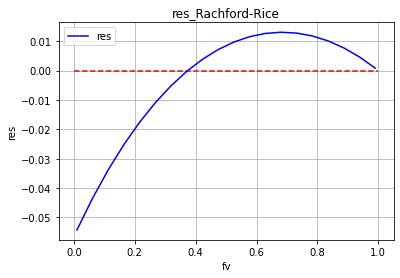

In [ ]:
# Fazendo o gráfico
fig1, ax1 = plt.subplots()
ax1.plot(fv_faixa, res_graf, 'b', label='res')
#ax1.plot(C_A_eq_teste[:,0], q_A_prev, 'r-', label='mod')
# Adicionando texto nos eixos - descrição
ax1.set_xlabel('fv')
ax1.set_ylabel('res')
# Adicionando título para a figura
ax1.set_title('res_Rachford-Rice')
# Adicionando linha
ax1.hlines(0.0,0.0, 1.0, colors='r', linestyles='dashed')
# Adicionando uma legenda
ax1.legend()
ax1.grid()

Observamos que o gráfico mostra exatamente o valor de fv encontrado pela função de Rachford-Rice. 